Import the Telco-Customer-Churn Dataset

In [1]:
import pandas as pd
df = pd.read_csv("churn_customer.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


EDA

In [2]:
import numpy as np
df.info()
df.isnull().sum()

print(df['Churn'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn distribution

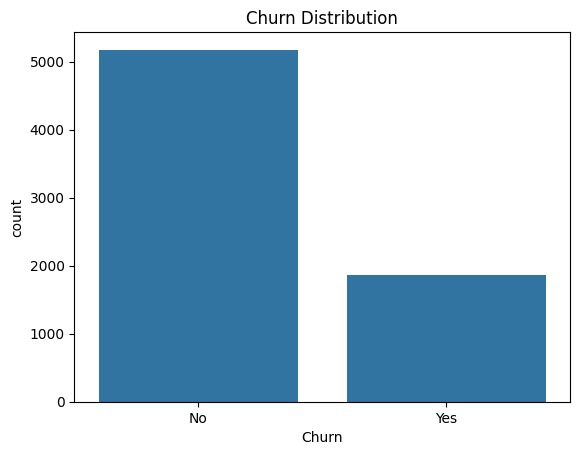

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

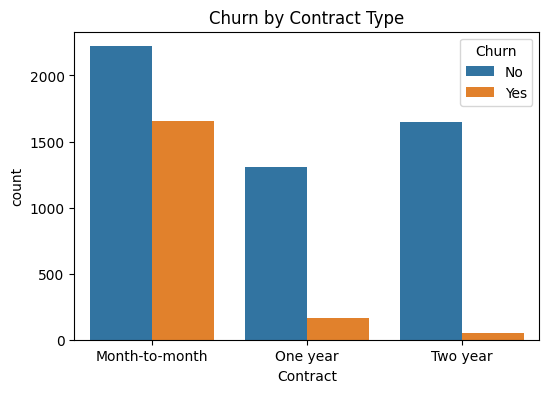

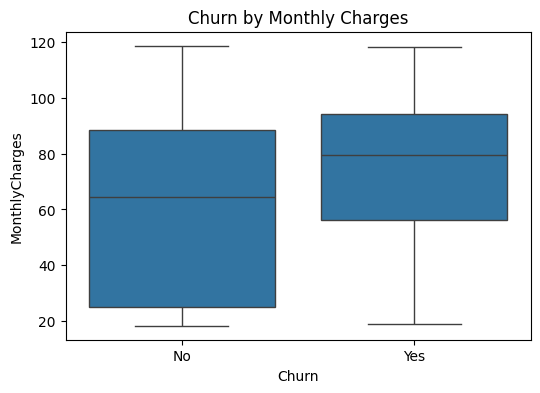

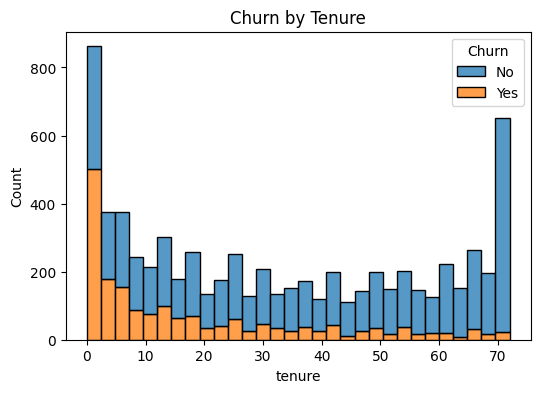

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y='MonthlyCharges',x="Churn", data=df)
plt.title("Churn by Monthly Charges")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Churn by Tenure")
plt.show()


Preprocessing of data

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Encode target (Yes/No → 1/0)
le = LabelEncoder()
y = le.fit_transform(y)

# Select categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [18]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

# Scale them
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


Split into test train

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5634, 13601)
Test shape: (1409, 13601)


Logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Evaluation metrics

In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7608232789212207


In [23]:

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[803 232]
 [105 269]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [24]:
from sklearn.metrics import roc_auc_score
print("LogReg ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


LogReg ROC-AUC: 0.8401612028210493
